In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import warnings
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification

In [5]:
# Ensure you have the NLTK data downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deeksha_ramakrishna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deeksha_ramakrishna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [7]:
# Define the stop words
stop_words = set(stopwords.words('english'))

In [8]:
warnings.filterwarnings("ignore")

In [9]:
import chardet

with open("data/wcpr_mypersonality.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)  # Example: {'encoding': 'Windows-1252', 'confidence': 0.99}


{'encoding': 'Windows-1252', 'confidence': 0.7299572146246162, 'language': ''}


In [10]:
df = pd.read_csv("data/wcpr_mypersonality.csv", sep=',', encoding="windows-1252",  on_bad_lines='skip')

In [11]:
df.head(10)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
5,b7b7764cfa1c523e4e93ab2a79a946c4,www.thejokerblogs.com,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/16/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
6,b7b7764cfa1c523e4e93ab2a79a946c4,"saw a nun zombie, and liked it. Also, *PROPNAM...",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/27/09 05:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
7,b7b7764cfa1c523e4e93ab2a79a946c4,is in Kentucky. 421 miles into her 1100 mile j...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/18/09 06:34 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
8,b7b7764cfa1c523e4e93ab2a79a946c4,was about to finish a digital painting before ...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/09/09 02:58 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
9,b7b7764cfa1c523e4e93ab2a79a946c4,is celebrating her new haircut by listening to...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/07/09 11:41 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


In [13]:
df.columns = df.columns.str.lower()

In [14]:
df.columns

Index(['#authid', 'status', 'sext', 'sneu', 'sagr', 'scon', 'sopn', 'cext',
       'cneu', 'cagr', 'ccon', 'copn', 'date', 'networksize', 'betweenness',
       'nbetweenness', 'density', 'brokerage', 'nbrokerage', 'transitivity'],
      dtype='object')

In [421]:
df.shape

(9917, 20)

In [15]:
df.head()

,#authid,status,sext,sneu,sagr,scon,sopn,cext,cneu,cagr,ccon,copn,date,networksize,betweenness,nbetweenness,density,brokerage,nbrokerage,transitivity
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


In [16]:
print(df.dtypes)

#authid          object
status           object
sext            float64
sneu            float64
sagr            float64
scon            float64
sopn            float64
cext             object
cneu             object
cagr             object
ccon             object
copn             object
date             object
networksize     float64
betweenness     float64
nbetweenness    float64
density         float64
brokerage       float64
nbrokerage      float64
transitivity    float64
dtype: object


In [17]:
df = df.dropna()

In [18]:
df.isnull().any()

#authid         False
status          False
sext            False
sneu            False
sagr            False
scon            False
sopn            False
cext            False
cneu            False
cagr            False
ccon            False
copn            False
date            False
networksize     False
betweenness     False
nbetweenness    False
density         False
brokerage       False
nbrokerage      False
transitivity    False
dtype: bool

In [20]:
df['cneu'] = df['cneu'].replace({'y': 1, 'n': 0})
df['cext'] = df['cext'].replace({'y': 1, 'n': 0})
df['cagr'] = df['cagr'].replace({'y': 1, 'n': 0})
df['ccon'] = df['ccon'].replace({'y': 1, 'n': 0})
df['copn'] = df['copn'].replace({'y': 1, 'n': 0})

In [21]:
df.cneu

0       1
1       1
2       1
3       1
4       1
       ..
9912    0
9913    1
9914    1
9915    1
9916    1
Name: cneu, Length: 9916, dtype: int64

In [431]:
df.dtypes

#authid          object
status           object
sext            float64
sneu            float64
sagr            float64
scon            float64
sopn            float64
cext              int64
cneu              int64
cagr              int64
ccon              int64
copn              int64
date             object
networksize     float64
betweenness     float64
nbetweenness    float64
density         float64
brokerage       float64
nbrokerage      float64
transitivity    float64
dtype: object

In [22]:
#Y = df['cneu']

In [23]:
#Y.head(10)

In [24]:
# drop the unwanted columns from the dataset 
X = df.drop(['date'], axis=1)

In [25]:
nlp = spacy.load("en_core_web_sm")

In [27]:
X.columns

Index(['#authid', 'status', 'sext', 'sneu', 'sagr', 'scon', 'sopn', 'cext',
       'cneu', 'cagr', 'ccon', 'copn', 'networksize', 'betweenness',
       'nbetweenness', 'density', 'brokerage', 'nbrokerage', 'transitivity'],
      dtype='object')

In [28]:
# Grouping and aggregating
user_data = df.groupby('#authid').agg({
    'status': ' '.join,         # Concatenate text
    'sext': 'mean',             # Average numerical traits
    'sneu': 'mean',
    'sagr': 'mean',
    'scon': 'mean',
    'sopn': 'mean',
    'networksize': 'first', 
    'betweenness': 'first',
    'nbetweenness': 'first',
    'density': 'first',
    'brokerage': 'first',
    'nbrokerage': 'first',
    'transitivity': 'first',
    'cext': lambda x: x.mode()[0],
    'cagr': lambda x: x.mode()[0],
    'ccon': lambda x: x.mode()[0],
    'cneu': lambda x: x.mode()[0]  # Take the majority class label
}).reset_index()

# Save to file
user_data.to_csv('user_level_dataset.csv', index=False)

print("User-level dataset with labels created.")

User-level dataset with labels created.


In [30]:
X = pd.read_csv("user_level_dataset.csv", sep=',', encoding="utf-8",  on_bad_lines='skip')

In [48]:
X.head(10)

,#authid,status,sext,sneu,sagr,scon,sopn,networksize,betweenness,nbetweenness,density,brokerage,nbrokerage,transitivity,cext,cagr,ccon,cneu
0,00419a4c96b32cd63b2c7196da761274,"[back, cali]",1.90,4.15,3.15,4.65,3.45,141.0,8399.66,86.33,0.07,9196.0,0.47,0.31,0,0,1,1
1,02c37028a782cfda660c7243e45244bb,"[Supervisor, PROPNAME, second, preference, Res...",2.05,4.00,2.20,2.20,3.75,134.0,8096.60,92.24,0.07,8311.0,0.47,0.35,0,0,0,1
2,03133a828cd0cf52e3752813ce5d818f,"[Cindy, times, minutes, jane, Save, joke, Cros...",3.84,3.55,2.85,4.32,3.45,584.0,164031.00,96.69,0.02,167499.0,0.49,0.12,1,0,1,1
3,03e6c4eca4269c183fa0e1780f73faba,"[criticize, generation, forget, raised, watche...",3.20,3.60,3.85,4.35,4.80,222.0,21894.70,90.06,0.04,23462.0,0.48,0.21,0,1,1,1
4,06b055f8e2bca96496514891057913c3,"[enjoying, cricket, comfy, boxers, rainy, weat...",2.85,2.35,3.35,4.70,3.35,194.0,18123.10,97.81,0.02,18313.0,0.49,0.06,0,0,1,0
5,0724fe854bd455061ba84efecdeff469,"[time, fire, life, livin, Cuando, vida, misma,...",3.00,3.15,2.95,3.55,4.80,236.0,25651.90,93.30,0.03,26805.0,0.49,0.18,0,0,1,1
6,0737e4e4980f56c9fb1cb5743001c917,"[wants, learn, make, French, macaroons, turnin...",3.35,2.30,4.10,2.40,4.50,431.0,91298.50,98.98,0.01,91701.0,0.50,0.03,0,1,0,0
7,0abd57182992dd9167b88b198350afe4,"[stuck, reality, dream, unpleasant, going, bac...",4.33,2.17,3.17,4.17,4.83,654.0,207792.00,97.61,0.01,210797.0,0.50,0.08,1,0,1,0
8,0bfa3d952ffed50f25011b128e73a820,"[glad, PROPNAME, taken, responsibility, happen...",2.80,1.60,3.65,3.25,4.15,463.0,103722.00,97.40,0.02,105113.0,0.49,0.13,0,1,0,0
9,0e09a1e89675e72bc2c3f2fac504fced,"[bought, cute, pair, purple, pumps, going, mov...",2.85,3.20,2.85,4.10,4.70,176.0,14764.90,96.98,0.03,14973.0,0.49,0.09,0,0,1,1


In [32]:
X.shape

(250, 18)

In [49]:
X['status'].astype(str)

0                                       ['back', 'cali']
1      ['Supervisor', 'PROPNAME', 'second', 'preferen...
2      ['Cindy', 'times', 'minutes', 'jane', 'Save', ...
3      ['criticize', 'generation', 'forget', 'raised'...
4      ['enjoying', 'cricket', 'comfy', 'boxers', 'ra...
                             ...                        
245    ['sverige', 'sweden', 'till', 'Sweden', 'Besta...
246    ['Totalled', 'last', 'night', 'Luckilly', 'inj...
247    ['youtube', 'rules', 'honestly', 'green', 'sou...
248    ['early', 'today', 'trip', 'Hamburg', 'gosh', ...
249    ['flying', 'back', 'friday', 'night', 'time', ...
Name: status, Length: 250, dtype: object

In [50]:
# Function to remove punctuation using spaCy
def remove_punctuation_spacy(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_punct])

In [52]:
# Apply to the column
X['status'] = X['status'].astype(str).apply(remove_punctuation_spacy)

In [53]:
# Remove the digits
X['status'] = X['status'].str.replace(r'\d+', '', regex=True)
X['status'] = X['status'].str.replace(r'/\W/', '', regex=True)


In [54]:
def clean_tokens(tokens):
    return [
        item for item in tokens 
        if len(item) >3 and re.match(r"^[a-zA-Z]+$", item)  # Keep words with 3+ characters and only letters
    ]

In [55]:
import nltk
from nltk.tokenize import word_tokenize

# Download the tokenizer model
nltk.download('punkt_tab')

# Apply tokenization
X['status'] = X['status'].astype(str).apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/deeksha_ramakrishna/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [56]:
X.head()

,#authid,status,sext,sneu,sagr,scon,sopn,networksize,betweenness,nbetweenness,density,brokerage,nbrokerage,transitivity,cext,cagr,ccon,cneu
0,00419a4c96b32cd63b2c7196da761274,"[back, cali]",1.90,4.15,3.15,4.65,3.45,141.0,8399.66,86.33,0.07,9196.0,0.47,0.31,0,0,1,1
1,02c37028a782cfda660c7243e45244bb,"[Supervisor, PROPNAME, second, preference, Res...",2.05,4.00,2.20,2.20,3.75,134.0,8096.60,92.24,0.07,8311.0,0.47,0.35,0,0,0,1
2,03133a828cd0cf52e3752813ce5d818f,"[Cindy, times, minutes, jane, Save, joke, Cros...",3.84,3.55,2.85,4.32,3.45,584.0,164031.00,96.69,0.02,167499.0,0.49,0.12,1,0,1,1
3,03e6c4eca4269c183fa0e1780f73faba,"[criticize, generation, forget, raised, watche...",3.20,3.60,3.85,4.35,4.80,222.0,21894.70,90.06,0.04,23462.0,0.48,0.21,0,1,1,1
4,06b055f8e2bca96496514891057913c3,"[enjoying, cricket, comfy, boxers, rainy, weat...",2.85,2.35,3.35,4.70,3.35,194.0,18123.10,97.81,0.02,18313.0,0.49,0.06,0,0,1,0


In [57]:
# remove stop words
X['status'] = X['status'].apply(lambda x: [item for item in x if item.lower() not in stop_words])


In [58]:
# remove words that has less than 3 characters and also remove any unwanted punctuations and symbols
X['status'] = X['status'].apply(clean_tokens)

In [59]:
X.head()

,#authid,status,sext,sneu,sagr,scon,sopn,networksize,betweenness,nbetweenness,density,brokerage,nbrokerage,transitivity,cext,cagr,ccon,cneu
0,00419a4c96b32cd63b2c7196da761274,"[back, cali]",1.90,4.15,3.15,4.65,3.45,141.0,8399.66,86.33,0.07,9196.0,0.47,0.31,0,0,1,1
1,02c37028a782cfda660c7243e45244bb,"[Supervisor, PROPNAME, second, preference, Res...",2.05,4.00,2.20,2.20,3.75,134.0,8096.60,92.24,0.07,8311.0,0.47,0.35,0,0,0,1
2,03133a828cd0cf52e3752813ce5d818f,"[Cindy, times, minutes, jane, Save, joke, Cros...",3.84,3.55,2.85,4.32,3.45,584.0,164031.00,96.69,0.02,167499.0,0.49,0.12,1,0,1,1
3,03e6c4eca4269c183fa0e1780f73faba,"[criticize, generation, forget, raised, watche...",3.20,3.60,3.85,4.35,4.80,222.0,21894.70,90.06,0.04,23462.0,0.48,0.21,0,1,1,1
4,06b055f8e2bca96496514891057913c3,"[enjoying, cricket, comfy, boxers, rainy, weat...",2.85,2.35,3.35,4.70,3.35,194.0,18123.10,97.81,0.02,18313.0,0.49,0.06,0,0,1,0


In [60]:
# Define a function to clean the tokenized text
def remove_excessive_repetition_from_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Remove words with excessive character repetition
        if not re.search(r'(\w)\1{2,}', token):  # Matches words with character repeated 3+ times
            cleaned_tokens.append(token)  # Keep valid tokens
    return cleaned_tokens

In [61]:
X['status'] = X['status'].apply(remove_excessive_repetition_from_tokens)

In [62]:
X.head

<bound method NDFrame.head of                               #authid  \
0    00419a4c96b32cd63b2c7196da761274   
1    02c37028a782cfda660c7243e45244bb   
2    03133a828cd0cf52e3752813ce5d818f   
3    03e6c4eca4269c183fa0e1780f73faba   
4    06b055f8e2bca96496514891057913c3   
..                                ...   
245  f83aa7290cf3ae8ed75d6aee5ebbb559   
246  fbe5aa478508d1dc931427ade5d9e1b4   
247  fc1c9fb6c64740edcbbf8cfe9dde8b02   
248  fe22087986fdcc65939c793fe0ec90a9   
249  fffafe151f07a30a0ede2038a897b680   

                                                status  sext  sneu  sagr  \
0                                         [back, cali]  1.90  4.15  3.15   
1    [Supervisor, PROPNAME, second, preference, Res...  2.05  4.00  2.20   
2    [Cindy, times, minutes, jane, Save, joke, Cros...  3.84  3.55  2.85   
3    [criticize, generation, forget, raised, watche...  3.20  3.60  3.85   
4    [enjoying, cricket, comfy, boxers, rainy, weat...  2.85  2.35  3.35   
..                   

In [63]:
# Define a function to join tokenized lists into strings
def join_tokens_to_sentence(tokens):
    return ' '.join(tokens)

In [64]:
X['status'] = X['status'].apply(join_tokens_to_sentence)

In [65]:
vectorizer = CountVectorizer(ngram_range=(1,1))
X_grams = vectorizer.fit_transform(X['status'])
num_features = len(vectorizer.vocabulary_)

In [66]:
vectorizer.get_feature_names_out()

array(['aaliyah', 'aamuks', 'aarp', ..., 'zulu', 'zumba', 'zynga'],
      dtype=object)

In [67]:
print(num_features)

13146


In [68]:
print(X_grams.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
from sklearn.decomposition import PCA

# Reduce to 10 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_grams.toarray())


In [70]:
X_pca

array([[-9.54782101e+00,  8.44975291e-01],
       [-9.02196885e+00,  1.59235094e+00],
       [-5.40513006e+00,  2.73424008e+00],
       [-5.68254012e+00,  3.24311627e+00],
       [-4.73112093e+00,  2.78504473e+00],
       [-8.39132168e+00, -1.45608789e-02],
       [ 2.59052730e+01, -5.71234462e+00],
       [-1.96298587e+00, -2.55629713e-01],
       [ 2.76370290e+01, -5.12292343e+00],
       [-7.47276652e+00, -4.22062490e-01],
       [-5.78182115e+00, -5.51232279e-01],
       [ 1.01626725e+01,  5.28086182e+00],
       [ 2.21984457e-01,  3.44321988e+00],
       [-5.43026295e+00,  1.41303465e+00],
       [-9.04801111e+00,  1.55628996e+00],
       [ 5.42002029e-01,  5.04220696e+00],
       [-9.18665711e+00,  6.19720805e-01],
       [-8.72204552e+00,  5.57013369e-01],
       [ 3.43506752e+00, -8.50125040e+00],
       [ 5.54955069e+00,  3.94250297e+00],
       [ 3.23779413e+01,  1.50770219e+01],
       [-7.23140305e+00,  1.70222028e+00],
       [-9.67807601e+00,  9.46680723e-01],
       [-8.

In [71]:
pca_df = pd.DataFrame(X_pca, columns=['pca1', 'pca2'])

In [72]:
pca_df.head()

,pca1,pca2
0,-9.547821,0.844975
1,-9.021969,1.592351
2,-5.405130,2.734240
3,-5.682540,3.243116
4,-4.731121,2.785045


In [73]:
X = pd.concat([X.reset_index(drop=True), pca_df], axis=1)

In [74]:
X.columns

Index(['#authid', 'status', 'sext', 'sneu', 'sagr', 'scon', 'sopn',
       'networksize', 'betweenness', 'nbetweenness', 'density', 'brokerage',
       'nbrokerage', 'transitivity', 'cext', 'cagr', 'ccon', 'cneu', 'pca1',
       'pca2'],
      dtype='object')

In [75]:
X.head

<bound method NDFrame.head of                               #authid  \
0    00419a4c96b32cd63b2c7196da761274   
1    02c37028a782cfda660c7243e45244bb   
2    03133a828cd0cf52e3752813ce5d818f   
3    03e6c4eca4269c183fa0e1780f73faba   
4    06b055f8e2bca96496514891057913c3   
..                                ...   
245  f83aa7290cf3ae8ed75d6aee5ebbb559   
246  fbe5aa478508d1dc931427ade5d9e1b4   
247  fc1c9fb6c64740edcbbf8cfe9dde8b02   
248  fe22087986fdcc65939c793fe0ec90a9   
249  fffafe151f07a30a0ede2038a897b680   

                                                status  sext  sneu  sagr  \
0                                            back cali  1.90  4.15  3.15   
1    Supervisor PROPNAME second preference Research...  2.05  4.00  2.20   
2    Cindy times minutes jane Save joke Crossfit cr...  3.84  3.55  2.85   
3    criticize generation forget raised watched wax...  3.20  3.60  3.85   
4    enjoying cricket comfy boxers rainy weather so...  2.85  2.35  3.35   
..                   

In [76]:
X.isnull().any()

#authid         False
status          False
sext            False
sneu            False
sagr            False
scon            False
sopn            False
networksize     False
betweenness     False
nbetweenness    False
density         False
brokerage       False
nbrokerage      False
transitivity    False
cext            False
cagr            False
ccon            False
cneu            False
pca1            False
pca2            False
dtype: bool

In [77]:
X = X.dropna()

In [78]:
X.shape

(250, 20)

In [79]:
X.isnull().any()

#authid         False
status          False
sext            False
sneu            False
sagr            False
scon            False
sopn            False
networksize     False
betweenness     False
nbetweenness    False
density         False
brokerage       False
nbrokerage      False
transitivity    False
cext            False
cagr            False
ccon            False
cneu            False
pca1            False
pca2            False
dtype: bool

In [80]:
Y = X['cneu']

In [81]:
Y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      0
      ..
245    0
246    0
247    0
248    0
249    0
Name: cneu, Length: 250, dtype: int64>

In [82]:
Y.shape

(250,)

In [86]:
X = X.drop(['status'], axis =1)

In [87]:
X.shape

(250, 18)

In [88]:
X.columns

Index(['#authid', 'sext', 'sneu', 'sagr', 'scon', 'sopn', 'networksize',
       'betweenness', 'nbetweenness', 'density', 'brokerage', 'nbrokerage',
       'transitivity', 'cext', 'cagr', 'ccon', 'pca1', 'pca2'],
      dtype='object')

In [89]:
X.head(1)

,#authid,sext,sneu,sagr,scon,sopn,networksize,betweenness,nbetweenness,density,brokerage,nbrokerage,transitivity,cext,cagr,ccon,pca1,pca2
0,00419a4c96b32cd63b2c7196da761274,1.9,4.15,3.15,4.65,3.45,141.0,8399.66,86.33,0.07,9196.0,0.47,0.31,0,0,1,-9.547821,0.844975


In [90]:
# Split the datafram in to train and test with random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [91]:
X_train.shape

(175, 18)

In [92]:
X_train.isnull()

,#authid,sext,sneu,sagr,scon,sopn,networksize,betweenness,nbetweenness,density,brokerage,nbrokerage,transitivity,cext,cagr,ccon,pca1,pca2
82,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
126,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
179,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [93]:
X_test.shape

(75, 18)

In [94]:
X_train.head(1)

,#authid,sext,sneu,sagr,scon,sopn,networksize,betweenness,nbetweenness,density,brokerage,nbrokerage,transitivity,cext,cagr,ccon,pca1,pca2
82,60751629cdaa2f62ebc9a33209fcca8e,4.5,1.5,3.25,3.5,4.75,826.0,338268.0,99.52,0.0,339027.0,0.5,0.01,1,0,1,2.517003,4.630015


In [95]:
X_train_user = X_train['#authid']

In [96]:
X_test_user = X_test['#authid']

In [98]:
X_train = X_train.drop(['#authid'], axis=1)
X_test = X_test.drop(['#authid'], axis=1)

In [99]:
clf = LogisticRegression(random_state=42)

In [100]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [102]:
pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp312-cp312-macosx_10_13_universal2.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp312-cp312-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl (63 kB)
Using cached pillow-11.0.0-cp312-cp312-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0

In [103]:
import matplotlib

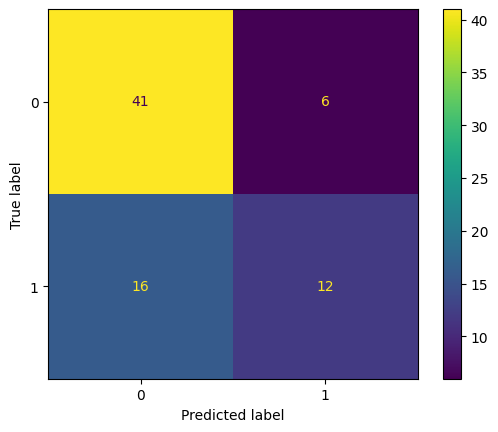

In [104]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [105]:
from sklearn.metrics import classification_report


In [106]:
Y_pred = clf.predict(X_test)

In [107]:
# Generate the classification report
report = classification_report(y_test, Y_pred, target_names=['0', '1'])

In [108]:
print(report)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        47
           1       0.67      0.43      0.52        28

    accuracy                           0.71        75
   macro avg       0.69      0.65      0.66        75
weighted avg       0.70      0.71      0.69        75



In [138]:
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=2, random_state=42)
clf_random.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10,
                       random_state=42)

In [139]:
y_pred = clf_random.predict(X_test)

In [140]:
report_random = classification_report(y_test, y_pred, target_names=['0', '1'])

In [141]:
print(report_random)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.90      1.00      0.95        28

    accuracy                           0.96        75
   macro avg       0.95      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75



In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [143]:
k = 5  
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [145]:
cv_scores = cross_val_score(clf_random, X_train, y_train, cv=kf, scoring='accuracy')


In [146]:
print(cv_scores)

[0.94285714 0.88571429 0.91428571 0.88571429 1.        ]


In [157]:
clf_dt = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=2)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [158]:
y_pred_dt = clf_dt.predict(X_test)

In [159]:
# Generate the classification report
report = classification_report(y_test, y_pred_dt, target_names=['0', '1'])

In [160]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        28

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [165]:
cv_scores_dt = cross_val_score(clf_dt, X_train, y_train, cv=kf, scoring='accuracy')


In [166]:
print(cv_scores_dt)

[1. 1. 1. 1. 1.]


In [167]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear', random_state=42)

In [168]:
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

In [169]:
report_svm = classification_report(y_test, y_pred_svm, target_names=['0', '1'])

In [170]:
print(report_svm)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        47
           1       0.52      0.54      0.53        28

    accuracy                           0.64        75
   macro avg       0.62      0.62      0.62        75
weighted avg       0.64      0.64      0.64        75



In [171]:
cv_scores_svm = cross_val_score(clf_svm, X_train, y_train, cv=kf, scoring='accuracy')

In [172]:
print(cv_scores_svm)

[0.54285714 0.54285714 0.65714286 0.51428571 0.62857143]
